In [2]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/Steel_industry_data.csv')
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh',
                        'CO2(tCO2)': 'CO2'})

In [4]:
df.shape

(35040, 11)

In [5]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

/tmp/ipykernel_205078/3018716760.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')


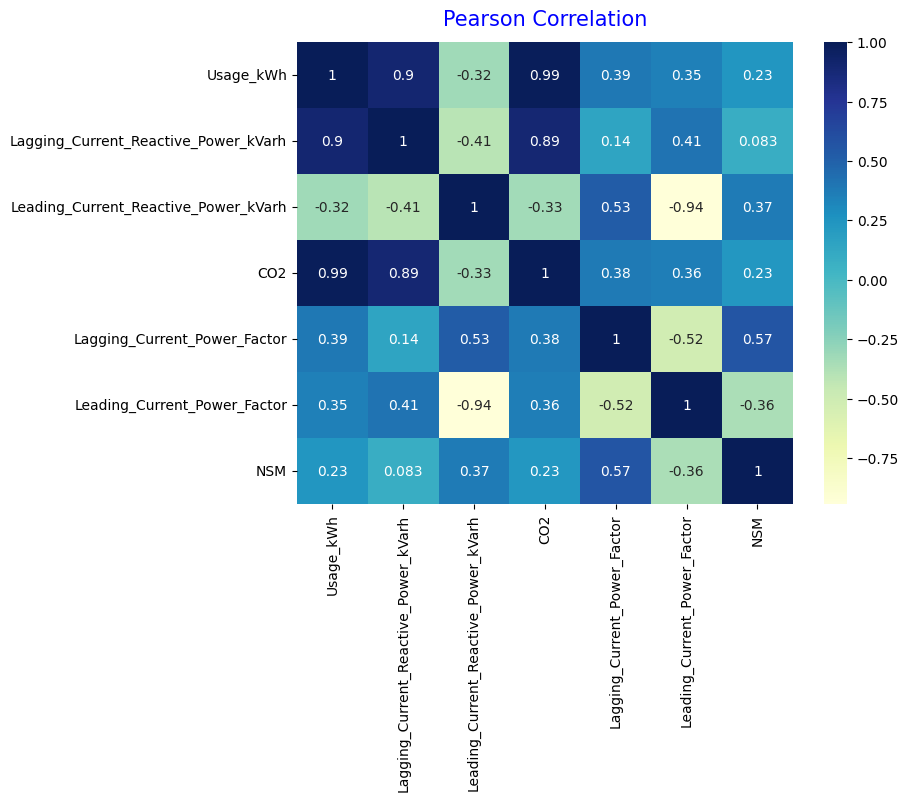

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Pearson Correlation", fontsize=15, color='b', pad=12, loc='center')
plt.show()

In [4]:
df = pd.read_csv('../data/Steel_industry_data.csv')
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh',
                        'CO2(tCO2)': 'CO2'})

# df = df.set_index('date')
# print(df.index)
#df["date"] =

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# создаем новые поля "hour" и "minute"
# df['time'] = (df['date'].dt.hour * 60. + df['date'].dt.minute)
df['day'] = (df['date'].dt.day)
# df['minute'] = df['date'].dt.minute / 60.

df.drop('date', axis=1, inplace=True)

#handling categorical data
df = pd.get_dummies(df, drop_first=True)

data = df.drop('Usage_kWh', axis=1)
df_norm = (data-data.min())/(data.max()-data.min())
df_norm = df_norm - df_norm.mean()
df_norm = pd.concat((df_norm, df["Usage_kWh"]), 1)
df = df_norm

df.describe()


# train-test split for time series
# train_size = int(len(df) * 0.67)
# test_size = len(df) - train_size
# train, test = df[:train_size], df[train_size:]

# X_train = train.drop('Usage_kWh', axis = 1)
# y_train = train['Usage_kWh']
#
# X_test = test.drop('Usage_kWh', axis = 1)
# y_test = test['Usage_kWh']

# train.head()

/tmp/ipykernel_170255/2686838792.py:24: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_norm = pd.concat((df_norm, df["Usage_kWh"]), 1)


,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,day,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load,Usage_kWh
count,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,35040.000000
mean,1.297795e-17,1.784468e-17,3.974497e-17,-4.380058e-17,-1.784468e-17,-4.106304e-18,-6.326750e-17,1.784468e-17,1.318073e-17,-6.286194e-18,-6.286194e-18,-6.488975e-18,-6.286194e-18,-6.083414e-18,-2.838926e-18,5.434516e-17,27.386892
std,1.682592e-01,2.674518e-01,2.307260e-01,1.892132e-01,3.045654e-01,2.917022e-01,2.932124e-01,4.513883e-01,3.523129e-01,3.495322e-01,3.495322e-01,3.495322e-01,3.495322e-01,3.495322e-01,4.055471e-01,4.473794e-01,33.444380
min,-1.345102e-01,-1.394434e-01,-1.646323e-01,-8.057806e-01,-8.436787e-01,-5.000000e-01,-4.906849e-01,-2.849315e-01,-1.452055e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-2.075342e-01,-2.767123e-01,0.000000
25%,-1.107768e-01,-1.394434e-01,-1.646323e-01,-1.725806e-01,1.533213e-01,-2.500000e-01,-2.573516e-01,-2.849315e-01,-1.452055e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-2.075342e-01,-2.767123e-01,3.200000
50%,-8.291594e-02,-1.394434e-01,-1.646323e-01,7.381944e-02,1.563213e-01,0.000000e+00,9.315068e-03,-2.849315e-01,-1.452055e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-2.075342e-01,-2.767123e-01,4.570000
75%,9.910862e-02,-6.415521e-02,1.210820e-01,1.844444e-01,1.563213e-01,2.500000e-01,2.426484e-01,7.150685e-01,-1.452055e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-1.424658e-01,-2.075342e-01,7.232877e-01,51.237500
max,8.654898e-01,8.605566e-01,8.353677e-01,1.942194e-01,1.563213e-01,5.000000e-01,5.093151e-01,7.150685e-01,8.547945e-01,8.575342e-01,8.575342e-01,8.575342e-01,8.575342e-01,8.575342e-01,7.924658e-01,7.232877e-01,157.180000


/tmp/ipykernel_384546/1523684375.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


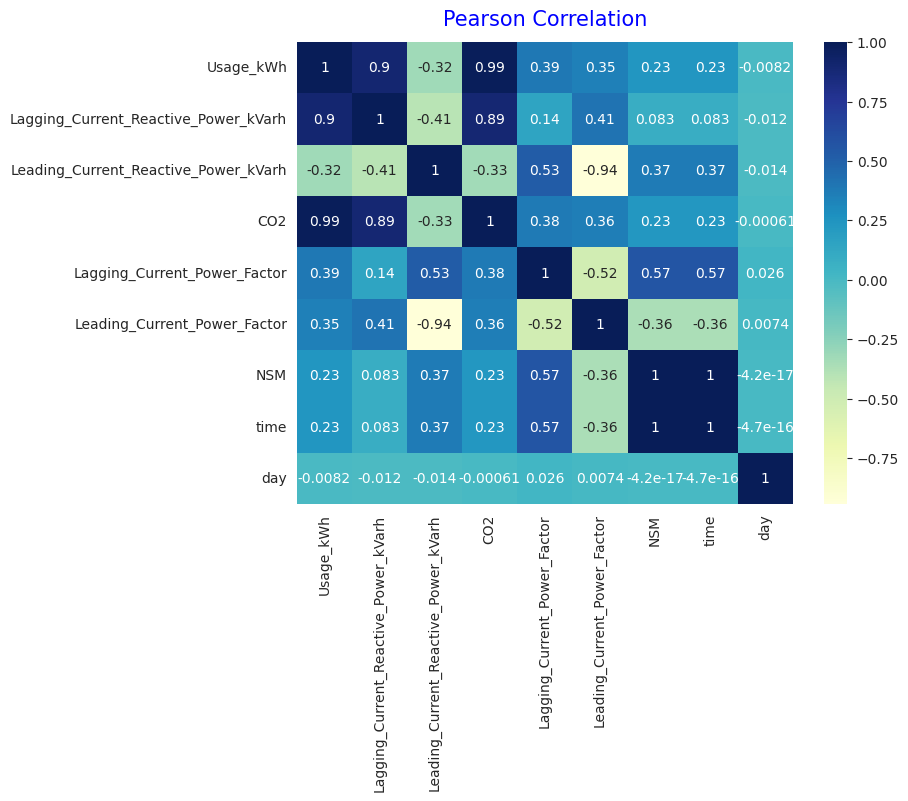

In [115]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Pearson Correlation", fontsize=15, color='b', pad=12, loc='center')
plt.show()

In [9]:
# import pandas as pd
# import numpy as np
#
# # создаем пример DataFrame
# df = pd.DataFrame({'A': [1, 2., 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
#
# # преобразовываем DataFrame в массив NumPy
# array = df.values
#
# print(array)

In [9]:
import torch


def create_dataset(dataset, lookback, shift):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range((len(dataset) - lookback - 1) // shift):
        feature = dataset[i * shift : i *shift + lookback].values
        target = dataset[i * shift + lookback : i * shift + lookback + 1]['Usage_kWh'].values
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

def create_dataset2(dataset, lookback, shift):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range((len(dataset) - lookback - 1) // shift):
        feature = dataset[i * shift : i *shift + lookback].values
        target = dataset[i * shift + lookback : i * shift + lookback + 1]['Usage_kWh'].values
        X.append(feature)
        y.append(target)
    return X, y


lookback = 8
shift = 4
# X_train, y_train = create_dataset(train, lookback, shift)
# X_test, y_test = create_dataset(test, lookback, shift)
X, y = create_dataset2(df, lookback, shift)
train_size = int(len(X) * 0.67)
test_size = len(df) - train_size

tt = torch.tensor
# import random
# random.shuffle(X)
# random.shuffle(y)

X_train, y_train = tt(X[:train_size]), tt(y[:train_size])
X_test, y_test = tt(X[train_size:]), tt(y[train_size:])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_test[0][0][0])


torch.Size([5867, 8, 17]) torch.Size([5867, 1])
torch.Size([2890, 8, 17]) torch.Size([2890, 1])
tensor(-0.0231, dtype=torch.float64)


In [20]:
import torch
import torch.nn as nn


class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='tanh').double()
        #self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True).double()
        self.fc1 = nn.Linear(hidden_size, hidden_size//2).double()
        self.fc2 = nn.Linear(hidden_size//2, output_size).double()
        self.relu = nn.ReLU().double()
        #self.relu = nn.Tanh().double()

        # for name, param in self.rnn.named_parameters():
        #     if 'weight_ih' in name:
        #         torch.nn.init.xavier_uniform_(param)
        #         print(param.shape)
        #     elif 'weight_hh' in name:
        #         torch.nn.init.orthogonal_(param)
        #         print("here")
        #     elif 'bias' in name:
        #         torch.nn.init.constant_(param, 0.0)

    def forward(self, x):
        out, _ = self.rnn(x)
        # Decode the hidden state of the last time step
        out = self.fc1(out[:, -1, :])
        out = self.relu(out)
        out = self.fc2(out)
        return out
        # return out[:, -1, :]

In [12]:
learning_rate = 0.01

model = RNNModel(10, 10, 1, 5)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

import torch.utils.data as data

loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

for X_batch, y_batch in loader:
    print(X_batch.shape)
    print(y_batch.shape)
    break

# for i in model.parameters():
#     print(i)
#     break

torch.Size([8, 1, 17])
torch.Size([8, 1])


0
Epoch 0: train RMSE 5.1316, test RMSE 4.7022


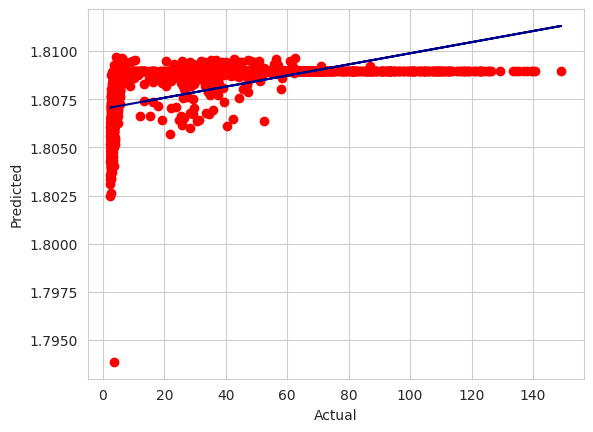

1
Epoch 1: train RMSE 4.9962, test RMSE 4.5578
2
Epoch 2: train RMSE 4.9827, test RMSE 4.5472
3
Epoch 3: train RMSE 4.9791, test RMSE 4.5477
4
Epoch 4: train RMSE 4.9398, test RMSE 4.5017
5
Epoch 5: train RMSE 4.8783, test RMSE 4.4440
6
Epoch 6: train RMSE 4.7892, test RMSE 4.3635
7
Epoch 7: train RMSE 4.6780, test RMSE 4.2657
8
Epoch 8: train RMSE 4.5529, test RMSE 4.1514
9
Epoch 9: train RMSE 4.4044, test RMSE 4.0148
10
Epoch 10: train RMSE 4.2120, test RMSE 3.8336


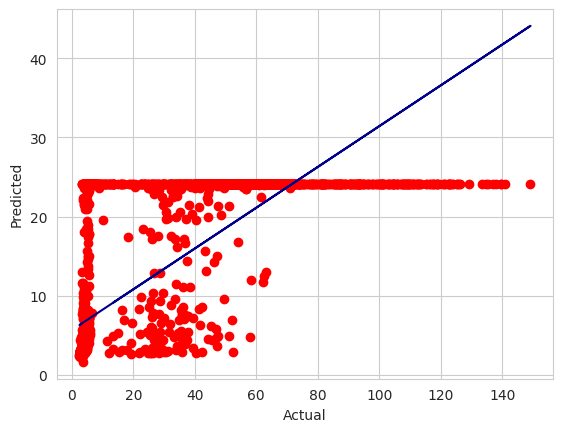

11
Epoch 11: train RMSE 4.0045, test RMSE 3.6400
12
Epoch 12: train RMSE 3.8027, test RMSE 3.4497
13
Epoch 13: train RMSE 3.6564, test RMSE 3.2990
14
Epoch 14: train RMSE 3.5800, test RMSE 3.2115
15
Epoch 15: train RMSE 3.5160, test RMSE 3.1451
16
Epoch 16: train RMSE 3.4741, test RMSE 3.0995
17
Epoch 17: train RMSE 3.4474, test RMSE 3.0674
18
Epoch 18: train RMSE 3.4328, test RMSE 3.0502
19
Epoch 19: train RMSE 3.4146, test RMSE 3.0281
20
Epoch 20: train RMSE 3.3830, test RMSE 3.0061


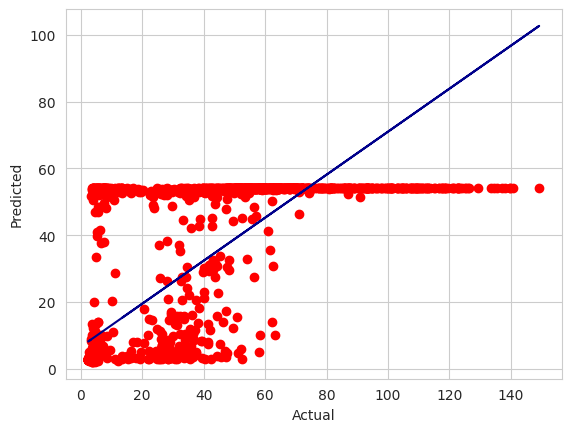

21
Epoch 21: train RMSE 3.2502, test RMSE 2.8801
22
Epoch 22: train RMSE 3.1495, test RMSE 2.8203
23
Epoch 23: train RMSE 3.0931, test RMSE 2.7749
24
Epoch 24: train RMSE 3.0489, test RMSE 2.7391
25
Epoch 25: train RMSE 3.0124, test RMSE 2.7091
26
Epoch 26: train RMSE 2.9799, test RMSE 2.6907
27
Epoch 27: train RMSE 2.9550, test RMSE 2.6669
28
Epoch 28: train RMSE 2.9293, test RMSE 2.6546
29
Epoch 29: train RMSE 2.9027, test RMSE 2.6312
30
Epoch 30: train RMSE 2.8823, test RMSE 2.6194


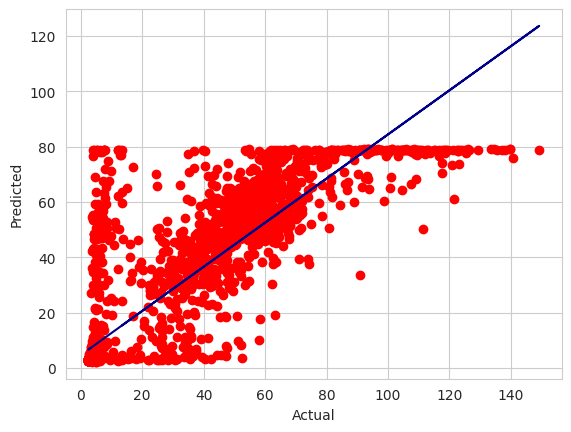

31
Epoch 31: train RMSE 2.8601, test RMSE 2.5993
32
Epoch 32: train RMSE 2.8385, test RMSE 2.5871
33
Epoch 33: train RMSE 2.8277, test RMSE 2.5852
34
Epoch 34: train RMSE 2.8203, test RMSE 2.5803
35
Epoch 35: train RMSE 2.8056, test RMSE 2.5741
36
Epoch 36: train RMSE 2.7960, test RMSE 2.5646
37
Epoch 37: train RMSE 2.7927, test RMSE 2.5647
38
Epoch 38: train RMSE 2.7832, test RMSE 2.5627
39
Epoch 39: train RMSE 2.7743, test RMSE 2.5560
40
Epoch 40: train RMSE 2.7675, test RMSE 2.5605


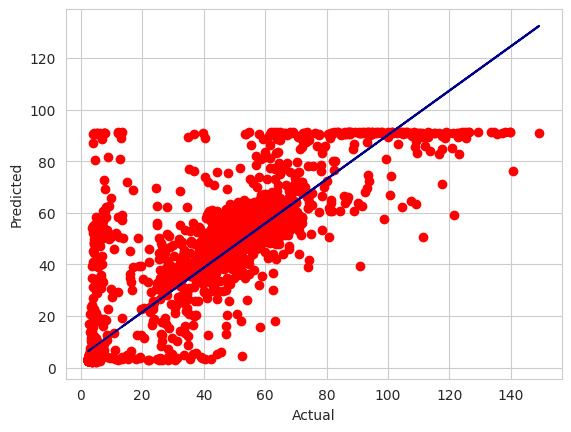

41
Epoch 41: train RMSE 2.7567, test RMSE 2.5545
42
Epoch 42: train RMSE 2.7542, test RMSE 2.5573
43
Epoch 43: train RMSE 2.7475, test RMSE 2.5456
44
Epoch 44: train RMSE 2.7446, test RMSE 2.5437
45
Epoch 45: train RMSE 2.7432, test RMSE 2.5456
46
Epoch 46: train RMSE 2.7286, test RMSE 2.5326
47
Epoch 47: train RMSE 2.7310, test RMSE 2.5303
48
Epoch 48: train RMSE 2.7276, test RMSE 2.5268
49
Epoch 49: train RMSE 2.7179, test RMSE 2.5203
50
Epoch 50: train RMSE 2.7233, test RMSE 2.5205


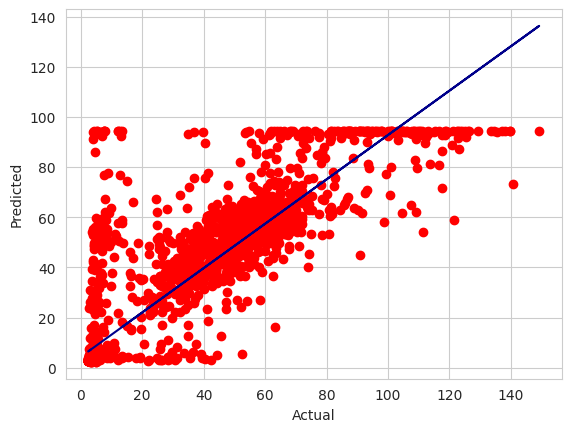

51
Epoch 51: train RMSE 2.7154, test RMSE 2.5096
52
Epoch 52: train RMSE 2.7100, test RMSE 2.4939
53
Epoch 53: train RMSE 2.7064, test RMSE 2.4967
54
Epoch 54: train RMSE 2.7091, test RMSE 2.5009
55
Epoch 55: train RMSE 2.7102, test RMSE 2.5055
56
Epoch 56: train RMSE 2.7032, test RMSE 2.4979
57
Epoch 57: train RMSE 2.7060, test RMSE 2.5011
58
Epoch 58: train RMSE 2.7040, test RMSE 2.5023
59
Epoch 59: train RMSE 2.7056, test RMSE 2.5039
60
Epoch 60: train RMSE 2.7058, test RMSE 2.5081


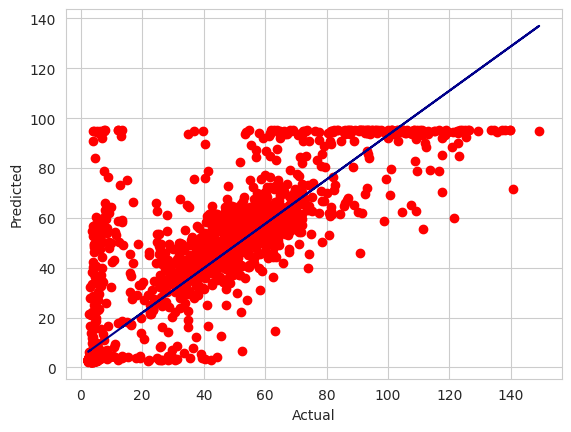

61
Epoch 61: train RMSE 2.7035, test RMSE 2.5052
62
Epoch 62: train RMSE 2.7013, test RMSE 2.5046
63
Epoch 63: train RMSE 2.6993, test RMSE 2.5067
64
Epoch 64: train RMSE 2.6962, test RMSE 2.4987
65
Epoch 65: train RMSE 2.6948, test RMSE 2.5034
66
Epoch 66: train RMSE 2.6911, test RMSE 2.4998
67
Epoch 67: train RMSE 2.6924, test RMSE 2.5039
68
Epoch 68: train RMSE 2.7000, test RMSE 2.5158
69
Epoch 69: train RMSE 2.6909, test RMSE 2.5053
70
Epoch 70: train RMSE 2.6985, test RMSE 2.5157


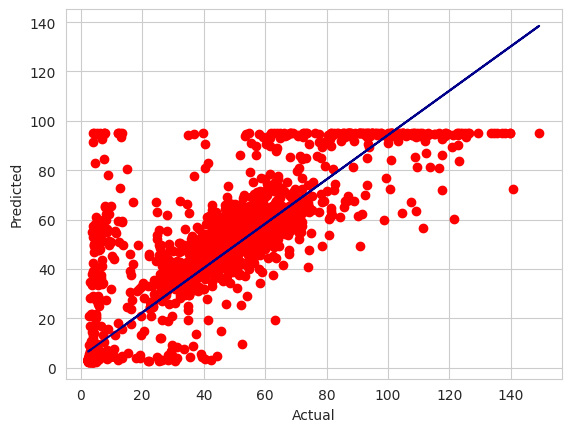

71
Epoch 71: train RMSE 2.6964, test RMSE 2.5150
72
Epoch 72: train RMSE 2.6987, test RMSE 2.5143
73
Epoch 73: train RMSE 2.6845, test RMSE 2.5027
74
Epoch 74: train RMSE 2.6887, test RMSE 2.5007
75
Epoch 75: train RMSE 2.7029, test RMSE 2.5203
76
Epoch 76: train RMSE 2.6916, test RMSE 2.5127
77
Epoch 77: train RMSE 2.6856, test RMSE 2.5055
78
Epoch 78: train RMSE 2.6805, test RMSE 2.4977
79
Epoch 79: train RMSE 2.6877, test RMSE 2.5051
80
Epoch 80: train RMSE 2.6864, test RMSE 2.5075


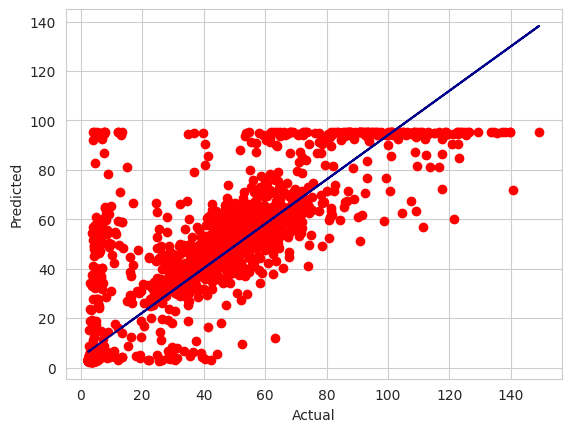

81
Epoch 81: train RMSE 2.6829, test RMSE 2.5050
82
Epoch 82: train RMSE 2.6913, test RMSE 2.5107
83
Epoch 83: train RMSE 2.6794, test RMSE 2.5002
84
Epoch 84: train RMSE 2.6726, test RMSE 2.4957
85
Epoch 85: train RMSE 2.6721, test RMSE 2.4961
86
Epoch 86: train RMSE 2.6881, test RMSE 2.5075
87
Epoch 87: train RMSE 2.6733, test RMSE 2.4971
88
Epoch 88: train RMSE 2.6705, test RMSE 2.4939
89
Epoch 89: train RMSE 2.6795, test RMSE 2.4984
90
Epoch 90: train RMSE 2.6713, test RMSE 2.4979


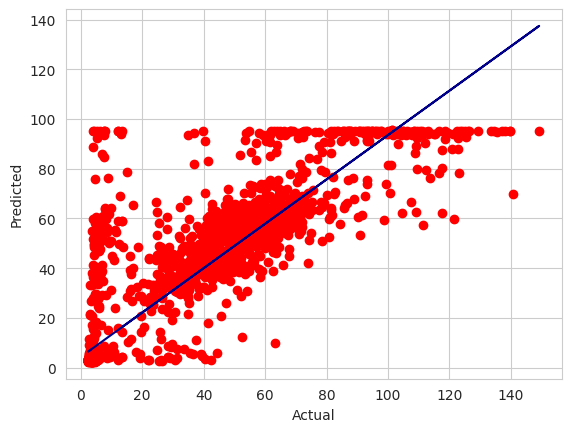

91
Epoch 91: train RMSE 2.6750, test RMSE 2.5057
92
Epoch 92: train RMSE 2.6721, test RMSE 2.4960
93
Epoch 93: train RMSE 2.6687, test RMSE 2.4960
94
Epoch 94: train RMSE 2.6871, test RMSE 2.5217
95
Epoch 95: train RMSE 2.6809, test RMSE 2.5123
96


KeyboardInterrupt: 

In [23]:
from tqdm import tqdm

import numpy as np
import torch.optim as optim
import torch.utils.data as data
import time

num_layers = 3

# model = RNNModel(18, 8, 1, num_layers)
model = RNNModel(17, 8, 1, num_layers)

# optimizer = optim.SGD(model.parameters(), lr=0.0000001, momentum=0.9)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.L1Loss() ##nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=False, batch_size=64)

n_epochs = 1000
for epoch in range(n_epochs):
    print(epoch)
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        #print(y_pred)
        #print(X_batch)
        #print(time.sleep(3))
        loss = loss_fn(y_pred, y_batch)
        #print(np.sqrt(loss.detach().numpy()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    #
    # break

    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
    if epoch % 10 == 0:
        x = torch.squeeze(y_test).numpy()
        y = y_pred.numpy()

        # plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
        plt.plot(x, y, 'o', color = 'r')

        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m * x + b, color = 'darkblue')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.show()

    # print(y_pred[:10], y_test[:10])
    # for i in range(100):
    #     print(y_pred[i][0]-y_test[i][0])
    # print(X_test[:10])
    #break